**MY CHI DATA CLEANING**

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file_path = '/Users/dianedli/Downloads/PYTHON 1 /Final Project/My_CHI._My_Future._Programs.csv' 
data = pd.read_csv(file_path)
print(data.columns)

Index(['Program ID', 'Program Name', 'Description', 'Org Name',
       'Category Name', 'Capacity', 'Min Age', 'Max Age', 'Address', 'City',
       'State', 'ZIP Code', 'Program Type', 'Program URL', 'Online Address',
       'Registration URL', 'Registration Open', 'Registration Deadline',
       'Start Date', 'End Date', 'Start Time', 'End Time', 'Contact Name',
       'Contact Email', 'Contact Phone', 'Program Price',
       'Geographic Cluster Name', 'Scholarship Available', 'Participants Paid',
       'Transport Provided', 'Has Free Food', 'Meeting Type', 'Image',
       'Hidden Programs', 'Featured', 'Custom Categories', 'Tag', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')


Clean the data to find face to face programs and correspond them to zip codes 

In [7]:

# Load the dataset
file_path = '/Users/dianedli/Downloads/PYTHON 1 /Final Project/My_CHI._My_Future._Programs.csv'  
data = pd.read_csv(file_path)

# Check unique values in 'Meeting Type' to identify face-to-face programs
print("Unique Meeting Types in the dataset:")
print(data['Meeting Type'].unique())

# Filter the dataset for face-to-face programs
face_to_face_data = data[data['Meeting Type'].str.lower() == 'face_to_face']  

# Drop rows with missing ZIP Codes
face_to_face_data = face_to_face_data.dropna(subset=['ZIP Code'])

# Ensure ZIP Code column is properly formatted as integers
face_to_face_data['ZIP Code'] = face_to_face_data['ZIP Code'].astype(int)

# Display the cleaned dataset summary
print(f"Filtered dataset contains {len(face_to_face_data)} rows.")

# Save the cleaned data to a new file (optional)
filtered_file_path = 'filtered_face_to_face_programs.csv'
face_to_face_data.to_csv(filtered_file_path, index=False)
print(f"Filtered dataset saved to {filtered_file_path}")

Unique Meeting Types in the dataset:
['online' 'face_to_face']
Filtered dataset contains 217740 rows.
Filtered dataset saved to filtered_face_to_face_programs.csv


## Exploratory data analysis

### Analysis 1
BY DIANE 

QUESTION 1: In my analysis, I first wanted to answer the question of if there was a signifcant amount more programs in high-income zip codes verses medium or low income zip codes. I then wanted to plot this out in an interactive heat map for our stakeholders to easily visualize the areas with high and low program counts. 

Next, I moved on to creating the interactive heat map. To do this, I merged the GeoJSON file, the median_income csv file, and the filtered face_to_face data file to plot into the GeoJSON. My map is meant to show a heat map based on program counts and include information about the "Cluster Name", "ZIP Code", "Program Counts", and "Median Income". 

After plotting this, I went into more in-depth data analysis to find if wealthier zip codes were getting more in-person programs. To effectively bin the data and create a bar chart that illustrated the program counts for each zip code based on median income, I began by loading and cleaning income and program data, ensuring the ZIP code columns are compatible for merging. Then identifying the top 3 and bottom 3 ZIP codes based on median household income and combined them. After merging program data with income data, the programs are filtered to include only those in the selected ZIP codes. The number of programs in each ZIP code is counted, and these counts are merged with income data for better context. Finally, a bar chart is created to visualize the number of programs per ZIP code, with median income values annotated above each bar for clarity.

Next, I moved on to creating an interactive heat map for median_income and plotted information icons in the top and bottom 3 zip codes for program counts. 

DATA CLEANING: 
- Some ZIP codes in the filtered_face_to_face programs.csv dataset were not present in the Boundaries - ZIP Codes.geojson file. To handle these missing values, I extracted all ZIP codes from the GeoJSON file, identified missing ZIP codes by checking which ZIP Code values in the program dataset were absent in the GeoJSON file, and I filtered the program dataset to retain only rows where ZIP Code values matched the GeoJSON file. I also ensured data type consistency by converting the all ZIP Code columns in the datasets into integers, and then I grouped the program dataset by ZIP Code to calculate the number of programs in each ZIP code. 

RESULTS: 
Based on the initial plotting and analysis, it seemed like lower median_income zip codes were still getting a lot of programs compared to the higher median_income areas. To solidify this answer, I conducted a correlation analysis between the Median Household Income and The Program Count to find the correlation coefficient to be -0.11 and the P-value to be 0.419. Meaning, while there is a correlation of total program count decreasing with an increase in Median Household Income (perhaps due to higher quality programs and a lesser need to have more programs in quantity), this correlation is not statistically significant. 

PROBLEMS AND HOW I SOLVED THEM: 
- One problem I ran into when trying to plot the heatmap of program counts onto the geoJSON file of zip codes was dealing with missing zip code values. I found that there were some missing zip code values in the geoJSON file that corresponded to the face_to_face dataset. In order to address this issue, I conducted data cleaning and excluded the rows in the face_to_face dataframe that corresponded to ZIP codes not present in the GeoJSON file. 

- I also anticipated the counterargument that there might not be a socioeconomic link between program counts, which is why I created the heatmap interactive file--to illustrate that there could be many families comuting to nearby zip codes with more programs. 

# DIANE 

## Analysis by ZIP Codes

### Visualize top and bottom 3 zip codes based on program number

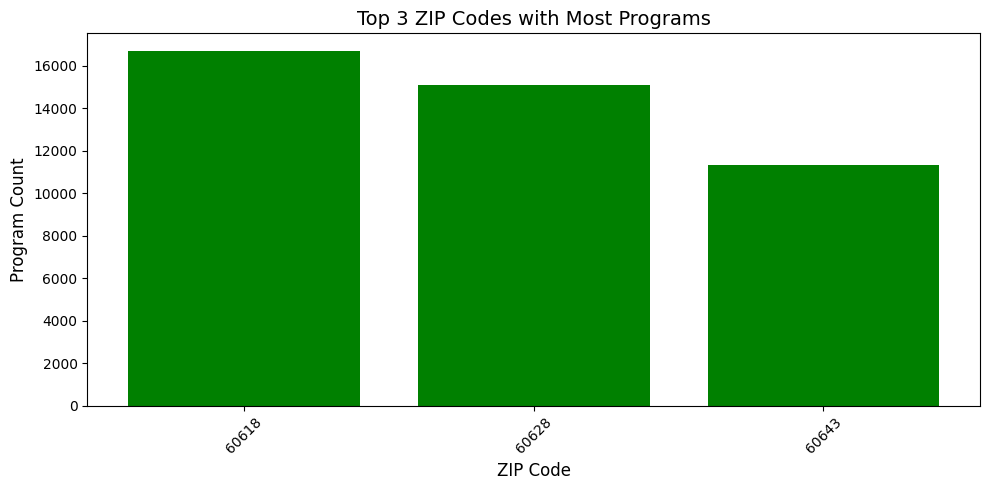

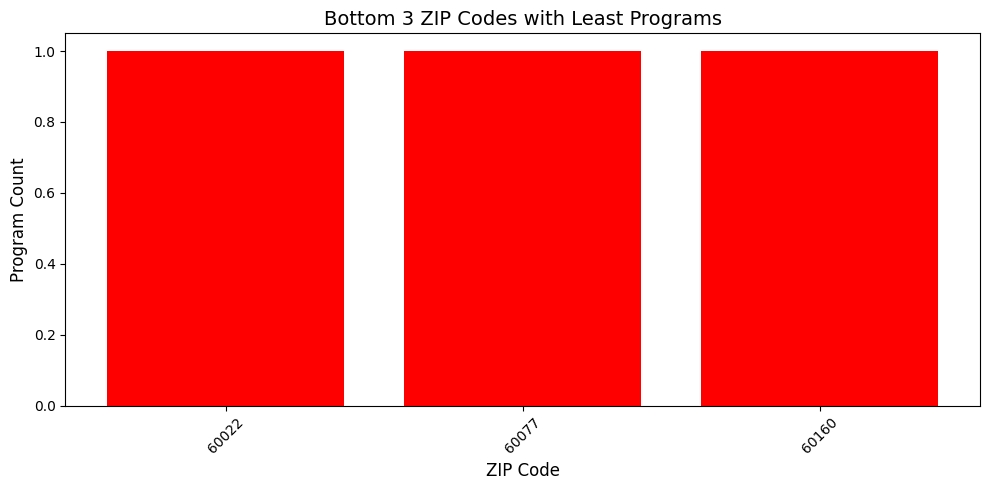

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import json
from shapely.geometry import shape

# Load data
data = pd.read_csv('/Users/dianedli/Downloads/PYTHON 1 /Final Project/filtered_face_to_face_programs.csv')
income_data = pd.read_csv('/Users/dianedli/Downloads/PYTHON 1 /Final Project/chicago median incomes 2024(Sheet1).csv')

# Group by ZIP Code and count programs
programs_per_zip = data.groupby('ZIP Code').size().reset_index(name='Program Count')

# Merge income data with program counts
programs_per_zip['ZIP Code'] = programs_per_zip['ZIP Code'].astype(int)
income_data['zip'] = income_data['zip'].astype(int)
merged_data = pd.merge(programs_per_zip, income_data, left_on='ZIP Code', right_on='zip', how='left')

# Sort by Program Count to find top 3 and bottom 3 ZIP Codes
top_3_zipcodes = programs_per_zip.nlargest(3, 'Program Count')
bottom_3_zipcodes = programs_per_zip.nsmallest(3, 'Program Count')


# Plotting top 3 ZIP Codes
plt.figure(figsize=(10, 5))
plt.bar(top_3_zipcodes['ZIP Code'].astype(str), top_3_zipcodes['Program Count'], color='green', width=0.8)
plt.title('Top 3 ZIP Codes with Most Programs', fontsize=14)
plt.xlabel('ZIP Code', fontsize=12)
plt.ylabel('Program Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# Plotting bottom 3 ZIP Codes
plt.figure(figsize=(10, 5))
plt.bar(bottom_3_zipcodes['ZIP Code'].astype(str), bottom_3_zipcodes['Program Count'], color='red', width=0.8)
plt.title('Bottom 3 ZIP Codes with Least Programs', fontsize=14)
plt.xlabel('ZIP Code', fontsize=12)
plt.ylabel('Program Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

### Use geojson file to create an interactive heatmap on income in zip codes and pin the three districts with the most number of programs and least number of programs 

- caveat from this is that the geojson file is missing some zip code values that align with the zip codes from the filtered face_to_face dataset. 
- in order to address this issue, let's exclude rows in face_to_face data that correspond to ZIP codes not present in the GeoJSON file. 

In [17]:
import pandas as pd
import folium
import json
from shapely.geometry import shape

# Define function to get the centroid of a ZIP code from GeoJSON
def get_zip_centroid(geojson, zip_code):
    """
    Get the centroid (latitude, longitude) of a given ZIP code from a GeoJSON object.

    Parameters:
    - geojson: The GeoJSON object containing ZIP code geometries.
    - zip_code: The ZIP code to find the centroid for.

    Returns:
    - A tuple (latitude, longitude) of the centroid, or None if the ZIP code is not found.
    """
    for feature in geojson['features']:
        if int(feature['properties']['zip']) == zip_code:
            geometry = shape(feature['geometry'])
            centroid = geometry.centroid
            return centroid.y, centroid.x
    return None

# Load data
data = pd.read_csv('/Users/dianedli/Downloads/PYTHON 1 /Final Project/filtered_face_to_face_programs.csv')
geojson_path = '/Users/dianedli/Downloads/PYTHON 1 /Final Project/Boundaries - ZIP Codes.geojson'
income_data = pd.read_csv('/Users/dianedli/Downloads/PYTHON 1 /Final Project/chicago median incomes 2024(Sheet1).csv')

# Load GeoJSON file
geojson_path = '/Users/dianedli/Downloads/PYTHON 1 /Final Project/Boundaries - ZIP Codes.geojson'
with open(geojson_path, 'r') as f:
    chicago_geojson = json.load(f)

# Find missing ZIP codes in the GeoJSON file
geojson_zips = [feature['properties']['zip'] for feature in chicago_geojson['features']]
missing_zips = data[~data['ZIP Code'].astype(str).isin(geojson_zips)]['ZIP Code'].unique()

# Drop rows in the DataFrame with missing ZIP codes
cleaned_programs = data[data['ZIP Code'].astype(str).isin(geojson_zips)]

print(f"Missing ZIP Codes: {missing_zips}")
print(f"Remaining ZIP Codes: {cleaned_programs['ZIP Code'].nunique()}")

# Ensure ZIP codes are integers
cleaned_programs['ZIP Code'] = cleaned_programs['ZIP Code'].astype(int)
income_data['zip'] = income_data['zip'].astype(int)

# Group program data by ZIP code
program_counts = cleaned_programs.groupby('ZIP Code').size().reset_index(name='Program Count')

# Merge income data and program counts
merged_data = pd.merge(program_counts, income_data, left_on='ZIP Code', right_on='zip', how='left')

# Add program and income data to GeoJSON properties
for feature in chicago_geojson['features']:
    zip_code = int(feature['properties']['zip'])
    data_row = merged_data[merged_data['ZIP Code'] == zip_code]
    if not data_row.empty:
        feature['properties']['program_count'] = int(data_row['Program Count'].values[0])
        feature['properties']['median_income'] = int(data_row['income_household_median'].values[0])
    else:
        feature['properties']['program_count'] = None
        feature['properties']['median_income'] = None

# Create the map
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Add a heatmap layer for income levels
folium.Choropleth(
    geo_data=chicago_geojson,
    name='choropleth',
    data=income_data,
    columns=['zip', 'income_household_median'],
    key_on='feature.properties.zip',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Median Household Income ($)'
).add_to(chicago_map)

# Sort by Program Count to find top 3 and bottom 3 ZIP Codes
top_3_zipcodes = programs_per_zip.nlargest(3, 'Program Count')
bottom_3 = merged_data.nsmallest(3, 'Program Count')

# Add red markers for top 3 ZIP codes
for _, row in top_3_zipcodes.iterrows():
    centroid = get_zip_centroid(chicago_geojson, row['ZIP Code'])
    if centroid:
        folium.Marker(
            location=centroid,
            popup=f"Top ZIP: {row['ZIP Code']}<br>Programs: {row['Program Count']}",
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(chicago_map)


# Add red markers for the bottom 3 ZIP codes
for _, row in bottom_3.iterrows():
    # Find the centroid of the ZIP code in GeoJSON
    zip_code = row['ZIP Code']
    feature = next((f for f in chicago_geojson['features'] if int(f['properties']['zip']) == zip_code), None)
    if feature:
        geometry = shape(feature['geometry'])
        centroid = geometry.centroid
        lat, lon = centroid.y, centroid.x
        # Add a marker to the map
        folium.Marker(
            location=[lat, lon],
            popup=f"ZIP: {zip_code}<br>Programs: {row['Program Count']}<br>Median Income: ${row['income_household_median']:,}",
            icon=folium.Icon(color='green', icon='info-sign')
        ).add_to(chicago_map)

# Add layer control
folium.LayerControl().add_to(chicago_map)

# Save the updated map to the same HTML file
map_file = '/Users/dianedli/Downloads/PYTHON 1 /Final Project/chicago_income_and_programs_map.html'
chicago_map.save(map_file)

print(f"Updated map saved to {map_file}")

Missing ZIP Codes: [60018 60305 60153 60067 60804 60301 60302 60635 60304 60130 60201 60077
 60208 60160 60473 60120 60563 60439 61920 60506 60515 60187 66210 60022]
Remaining ZIP Codes: 58
Updated map saved to /Users/dianedli/Downloads/PYTHON 1 /Final Project/chicago_income_and_programs_map.html


/var/folders/kq/jzvl0lj93tngqfrb3043cvjc0000gn/T/ipykernel_33134/3587192897.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_programs['ZIP Code'] = cleaned_programs['ZIP Code'].astype(int)


To ensure the geoJSON and programs_per_zip cover all ZIP codes in GeoJSON

In [18]:
# Extract ZIP codes from GeoJSON
geojson_zips = [feature['properties']['zip'] for feature in chicago_geojson['features']]

# Compare with your dataset
data_zips = programs_per_zip['ZIP Code'].astype(str).tolist()

# Find ZIP codes in GeoJSON but not in your dataset
missing_zips = set(geojson_zips) - set(data_zips)
print(f"Missing ZIP codes: {missing_zips}")

Missing ZIP codes: {'60666'}


Fill missing ZIP codes (60666) to the DataFrame with Program Count of 0

In [19]:
# Add missing ZIP codes to the DataFrame with a Program Count of 0
for zip_code in missing_zips:
    programs_per_zip = pd.concat(
        [programs_per_zip, pd.DataFrame({'ZIP Code': [int(zip_code)], 'Program Count': [0]})],
        ignore_index=True
    )

### Plot an interactive map with all the information based on zip codes with the heatmap showing the number of programs in that area 

In [20]:
import pandas as pd
import folium
import json
from shapely.geometry import shape

# Load summarized data (programs per ZIP code)
file_path = '/Users/dianedli/Downloads/PYTHON 1 /Final Project/filtered_face_to_face_programs.csv'
data = pd.read_csv(file_path)

#Load income data 
income_data = pd.read_csv('/Users/dianedli/Downloads/PYTHON 1 /Final Project/chicago median incomes 2024(Sheet1).csv')

# Ensure ZIP codes are integers
data['ZIP Code'] = data['ZIP Code'].astype(int)
income_data['zip'] = income_data['zip'].astype(int)

# Group and summarize by ZIP Code, including Geographic Cluster Name
cluster_data = data.groupby('ZIP Code').agg({
    'Program Name': 'count',  # Count programs
    'Geographic Cluster Name': 'first'  # Take the first cluster name
}).reset_index()
cluster_data.rename(columns={'Program Name': 'Program Count'}, inplace=True)

# Merge program data with income data
cluster_data = pd.merge(cluster_data, income_data, left_on='ZIP Code', right_on='zip', how='left')

# Load the GeoJSON file
geojson_path = '/Users/dianedli/Downloads/PYTHON 1 /Final Project/Boundaries - ZIP Codes.geojson'
with open(geojson_path, 'r') as f:
    chicago_geojson = json.load(f)

# Create a base map centered on Chicago
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Add a choropleth layer for ZIP code heatmap
folium.Choropleth(
    geo_data=chicago_geojson,
    name='choropleth',
    data=cluster_data,
    columns=['ZIP Code', 'Program Count'],
    key_on='feature.properties.zip',  # Match the ZIP code property in GeoJSON
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Programs per ZIP Code'
).add_to(chicago_map)

# Add labels for ZIP codes and clusters
def get_centroid(geometry):
    """Extract the centroid of a Polygon or MultiPolygon."""
    geom = shape(geometry)
    return geom.centroid.y, geom.centroid.x  # Latitude, Longitude

for _, row in cluster_data.iterrows():
    # Find the feature in GeoJSON matching the ZIP code
    matching_features = [f for f in chicago_geojson['features'] if f['properties']['zip'] == str(row['ZIP Code'])]
    if matching_features:
        feature = matching_features[0]
        geometry = feature['geometry']
        lat, lon = get_centroid(geometry)  # Get centroid coordinates
        
        # Add marker with both program count and median income
        folium.Marker(
            location=[lat, lon],
            popup=(
                f"Cluster: {row['Geographic Cluster Name']}<br>"
                f"ZIP Code: {row['ZIP Code']}<br>"
                f"Programs: {row['Program Count']}<br>"
                f"Median Income: ${row['income_household_median']:,}"  # Add income data
            ),
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(chicago_map)


# Save the map as an HTML file
map_file = 'chicago_programs_with_clusters.html'
chicago_map.save(map_file)

print(f"Interactive map with ZIP codes and clusters saved to {map_file}")

Interactive map with ZIP codes and clusters saved to chicago_programs_with_clusters.html


Visualize the number of programs available for the top 3 and bottom 3 median income levels 
- acknolwedging that median incomes values are coming from only 2024 data 


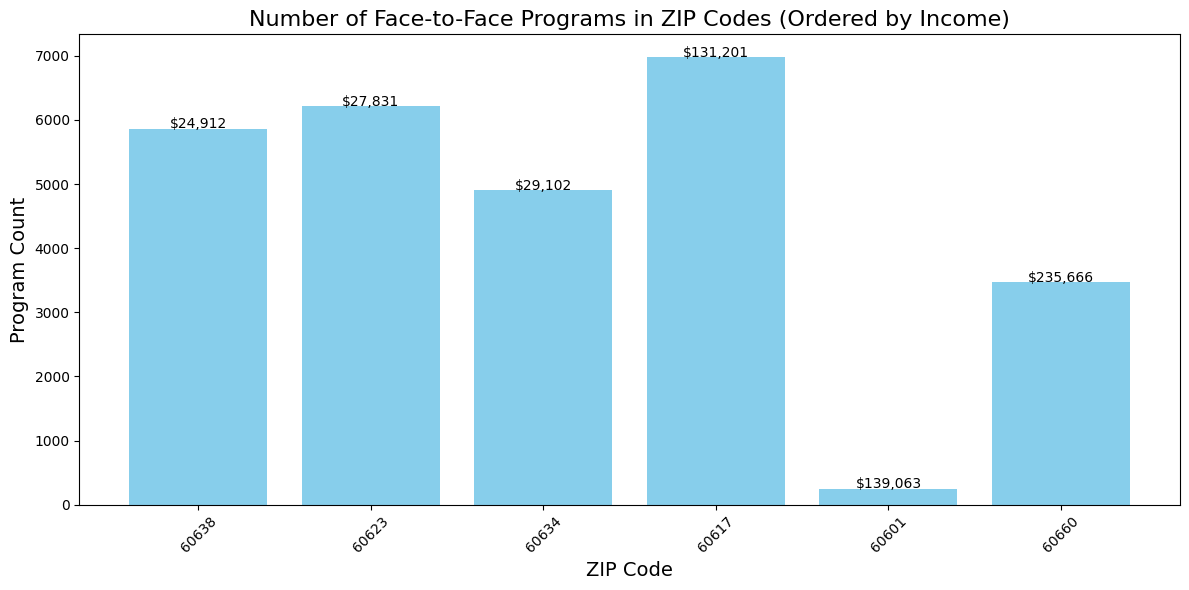

Top 3 ZIP Codes by Median Household Income:
      zip  income_household_median
3   60660                   235666
57  60601                   139063
41  60617                   131201

Bottom 3 ZIP Codes by Median Household Income:
      zip  income_household_median
22  60638                    24912
35  60623                    27831
25  60634                    29102


In [21]:
# Load income data
income_data = pd.read_csv('/Users/dianedli/Downloads/PYTHON 1 /Final Project/chicago median incomes 2024(Sheet1).csv')  
# Load program data
program_data = pd.read_csv('/Users/dianedli/Downloads/PYTHON 1 /Final Project/filtered_face_to_face_programs.csv')

# Sort by median household income to find top 3 and bottom 3 ZIP Codes
top_3_income_zipcodes = income_data.nlargest(3, 'income_household_median')
bottom_3_income_zipcodes = income_data.nsmallest(3, 'income_household_median')

# Combine top 3 and bottom 3 ZIP codes
selected_zips = pd.concat([top_3_income_zipcodes, bottom_3_income_zipcodes]).sort_values('income_household_median')

# Merge program data with income data to align ZIP codes
program_data['ZIP Code'] = program_data['ZIP Code'].astype(int)
income_data['zip'] = income_data['zip'].astype(int)
merged_data = pd.merge(program_data, income_data, left_on='ZIP Code', right_on='zip', how='inner')

# Filter for top 3 and bottom 3 ZIP codes
filtered_zips = pd.concat([top_3_income_zipcodes, bottom_3_income_zipcodes])
filtered_programs = merged_data[merged_data['ZIP Code'].isin(filtered_zips['zip'])]

# Count programs for each ZIP code
program_counts = filtered_programs.groupby('ZIP Code').size().reset_index(name='Program Count')

# Merge with income data for better labeling
program_counts = pd.merge(program_counts, income_data, left_on='ZIP Code', right_on='zip')
program_counts = program_counts.sort_values('income_household_median')

# Plot the data
plt.figure(figsize=(12, 6))
bars = plt.bar(program_counts['ZIP Code'].astype(str), program_counts['Program Count'], color='skyblue')

# Add median income as text above each bar
for bar, income in zip(bars, program_counts['income_household_median']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f"${income:,}", ha='center', fontsize=10)

# Customize the plot
plt.title('Number of Face-to-Face Programs in ZIP Codes (Ordered by Income)', fontsize=16)
plt.xlabel('ZIP Code', fontsize=14)
plt.ylabel('Program Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Print results
print("Top 3 ZIP Codes by Median Household Income:")
print(top_3_income_zipcodes)

print("\nBottom 3 ZIP Codes by Median Household Income:")
print(bottom_3_income_zipcodes)

Conduct a correlation analysis to test significance of findings 

Correlation Coefficient: -0.11
P-value: 4.19e-01


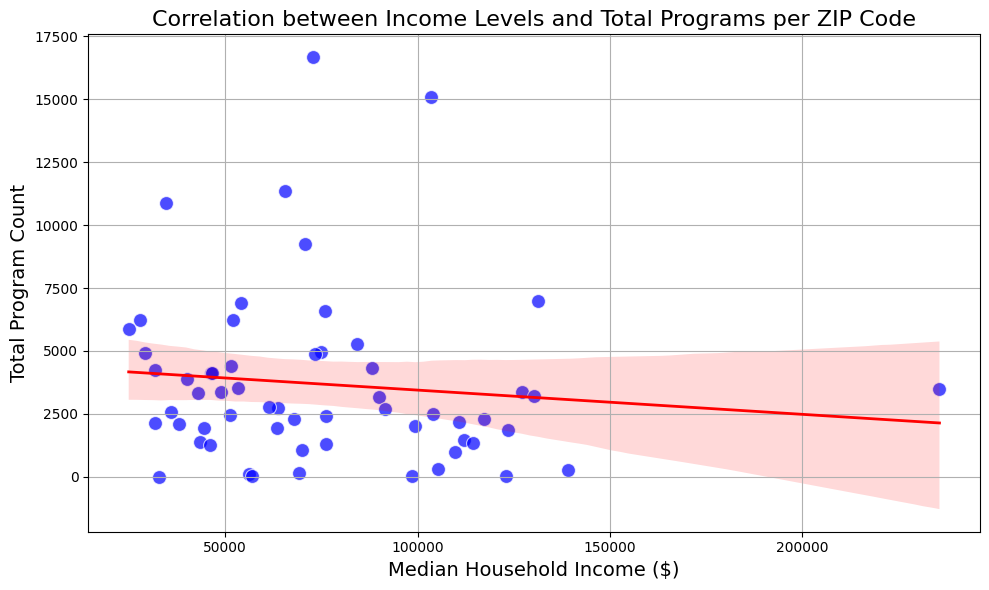

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load program data
program_data = pd.read_csv('/Users/dianedli/Downloads/PYTHON 1 /Final Project/filtered_face_to_face_programs.csv')

# Load income data
income_data = pd.read_csv('/Users/dianedli/Downloads/PYTHON 1 /Final Project/chicago median incomes 2024(Sheet1).csv')  

# Ensure ZIP codes are integers for consistency
program_data['ZIP Code'] = program_data['ZIP Code'].astype(int)
income_data['zip'] = income_data['zip'].astype(int)

# Group program data by ZIP Code and count total programs
programs_per_zip = program_data.groupby('ZIP Code').size().reset_index(name='Program Count')

# Merge program data with income data
merged_data = pd.merge(programs_per_zip, income_data, left_on='ZIP Code', right_on='zip')

# Correlation Analysis
correlation, p_value = pearsonr(merged_data['Program Count'], merged_data['income_household_median'])
print(f"Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.2e}")

# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=merged_data['income_household_median'],
    y=merged_data['Program Count'],
    s=100,
    color='blue',
    alpha=0.7
)
sns.regplot(
    x=merged_data['income_household_median'],
    y=merged_data['Program Count'],
    scatter=False,
    color='red',
    line_kws={"linewidth": 2}
)
plt.title('Correlation between Income Levels and Total Programs per ZIP Code', fontsize=16)
plt.xlabel('Median Household Income ($)', fontsize=14)
plt.ylabel('Total Program Count', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

### Analyzing number of youth programs and median household income 

QUESTION 2: Do higher median income areas have more programs for children? (aka under 18 years old)  

To answer this I conducted another correlation analysis. I filtered the program data to include only youth programs with a maximum age of 18 or less and grouped them by ZIP code to count the number of programs per ZIP code. I ensured ZIP codes were consistently formatted as integers to facilitate merging. Next, I merged the youth program counts with income data based on ZIP codes. I performed a correlation analysis to assess the relationship between youth program counts and median household income, calculating both the correlation coefficient and p-value. Finally, I created a scatter plot with a regression line to visualize the relationship, adding labels and a grid for clarity.

RESULTS: While there was an overally downward trend for Youth Program Counts to decrease with an increase in Median Income (correlation coefficient of -0.20), the p-value was 0.131, meaning this correlation would not be statistically significant at the 0.05 level. 

PROBLEMS & HOW I SOLVED THEM: 
One problem I anticipated was that the median income data would not be the most up-to-date as neighborhoods sometimes change with gentrification, etc. I made sure to look for the most up to date median income data of 2024 to avoid this issue. This way the face_to_face data would represent the cumulative program counts. In the future it would be interesting to analyze the rate at which programs are expanding in low, medium, and high income zones.  




Correlation Coefficient: -0.20
P-value: 1.31e-01


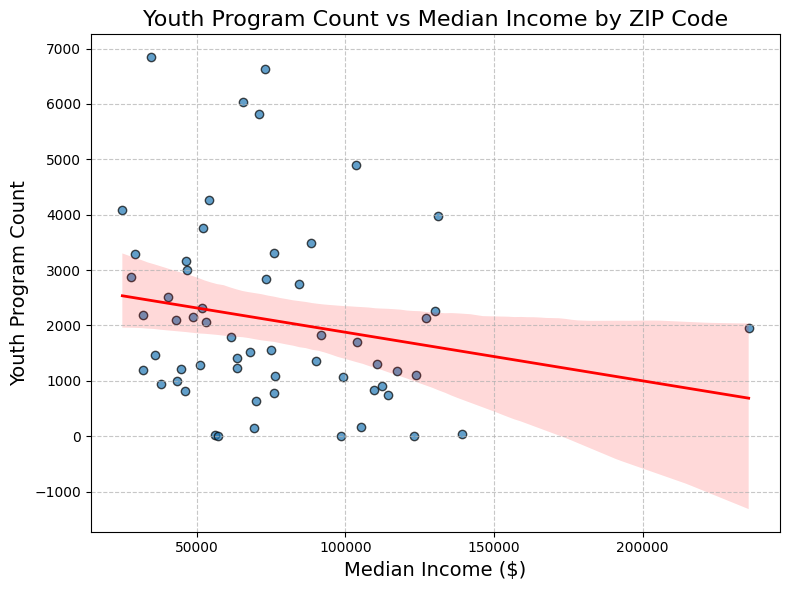

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Filter for programs where Max Age <= 18
youth_programs = program_data[program_data['Max Age'] <= 18]

# Group by ZIP Code and count programs
program_counts = youth_programs.groupby('ZIP Code').size().reset_index(name='Youth Program Count')

# Ensure ZIP codes are integers for consistency
program_counts['ZIP Code'] = program_counts['ZIP Code'].astype(int)
income_data['zip'] = income_data['zip'].astype(int)

# Merge program counts with income data
merged_data = pd.merge(program_counts, income_data, left_on='ZIP Code', right_on='zip', how='inner')

# Perform correlation analysis
correlation, p_value = pearsonr(merged_data['Youth Program Count'], merged_data['income_household_median'])
print(f"Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.2e}")

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    x='income_household_median',
    y='Youth Program Count',
    data=merged_data,
    scatter_kws={'alpha': 0.7, 'edgecolor': 'k'},
    line_kws={'color': 'red', 'lw': 2},
)

# Add labels and title
plt.title('Youth Program Count vs Median Income by ZIP Code', fontsize=16)
plt.xlabel('Median Income ($)', fontsize=14)
plt.ylabel('Youth Program Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Analyzing number of STEM programs and median household income 

QUESTION 3: Is there a difference in the number of STEM programs for how and low income areas? 

To answer this, I conducted another correlation analysis. First, I calculated and printed the 25th and 75th percentile thresholds of median household income to identify low and high-income levels. Then, I cleaned the category names in the dataset by removing trailing periods and whitespace, then extracted and displayed the unique categories. To analyze this relationship, I filtered STEM-related programs, grouping them by ZIP code, and merged the counts with income data. Correlation analysis was performed to evaluate the relationship between STEM program counts and median income, visualized using a scatter plot with a regression line. ZIP codes were classified into low, moderate, and high-income levels based on income thresholds, and the average STEM program count for each income level was calculated. A bar chart was created to show the average STEM program count by income level, highlighting differences across income groups. 

DATA CLEANING: 
- To process the number of STEM programs, the Category Name column was processed to ensure consistent formatting by removing unnecessary trailing periods and leading or trailing whitespace using the str.rstrip('.') and str.strip() methods. Finally, the unique cleaned categories were extracted and displayed. When conducting the correlation analysis between Median Income and STEM Program Counts, after merging the face_to_face dataset and the Median Income dataset, I removed all rows with missing values to ensure there was no skew to the correlation line. 

RESULTS: While there was an overall downward trend of STEM program counts as median income increased (correlation coefficient is -0.18), the p-value was 0.187 and the regression would not be statistically significant at the 0.05 percent level. 

PROBLEMS & HOW I SOLVED THEM: 
I had to explicity look through columns to see what constituted a STEM program. I cleaned the category names in the dataset by removing trailing periods and whitespace, identified the unique categories, and defined a list of STEM-related categories as anything subject that was heavily STEM based, or involved STEM processes: (Science', 'Math', 'Science & Math', 'Computers', 'Building & Fixing Things', 'Digital Media', 'Transportation').

I also had to make sure the lower, medium, and high income levels were determined through statistical methods relative to the data provided. To do this, I calculated and printed the 25th and 75th percentile income thresholds to define low and high-income levels in the dataset. 

Use statistical methods to determine high or low income thresholds 

In [24]:
low_income_threshold = income_data['income_household_median'].quantile(0.25)  # 25th percentile
high_income_threshold = income_data['income_household_median'].quantile(0.75)  # 75th percentile

print(f"Low Income Threshold (25th percentile): ${low_income_threshold:,.0f}")
print(f"High Income Threshold (75th percentile): ${high_income_threshold:,.0f}")

Low Income Threshold (25th percentile): $46,553
High Income Threshold (75th percentile): $100,332


Find categories under STEM 

In [25]:
my_chi = pd.read_csv('/Users/dianedli/Downloads/PYTHON 1 /Final Project/My_CHI._My_Future._Programs.csv')

# Clean category names: Remove trailing periods and leading/trailing whitespace
my_chi['Category Name'] = my_chi['Category Name'].str.rstrip('.').str.strip()

# Get unique categories after cleaning
unique_categories = my_chi['Category Name'].unique()

# Display unique categories
print("Unique Categories After Cleaning:")
print(unique_categories)

Unique Categories After Cleaning:
['Academic Support' 'Reading & Writing' 'Music & Art' 'Sports + Wellness'
 'Science' 'Work + Career' 'Computers' 'Food' 'Nature'
 'Helping Your Community' 'Healthcare' 'Building & Fixing Things'
 'Managing Money' 'Digital Media' 'Social Studies' 'Performance'
 'Customer/Human Service' 'Math' 'Transportation' 'Teaching'
 'Science & Math' 'Law' nan]


Conduct correlation analysis between STEM program count and median income levels 

data cleaning: remove all zip codes that don't align with income data.

Correlation Coefficient: -0.18
P-value: 1.87e-01


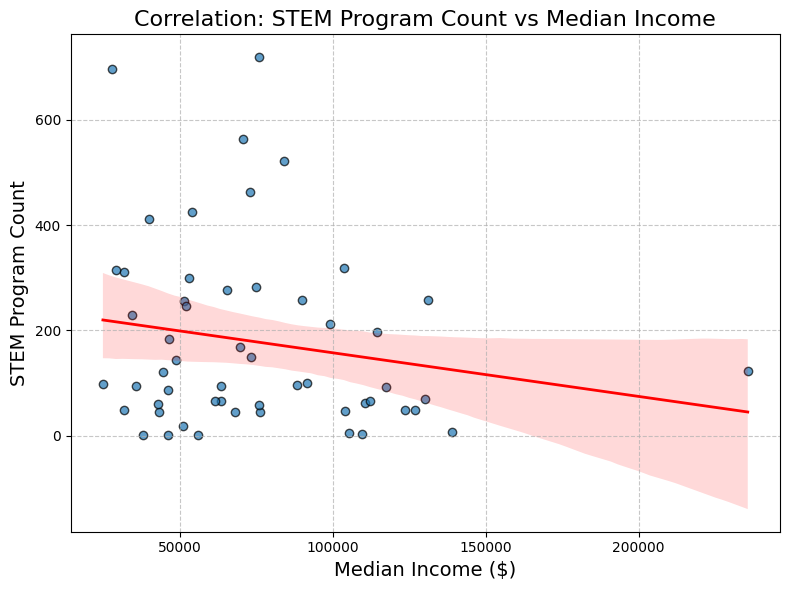

/var/folders/kq/jzvl0lj93tngqfrb3043cvjc0000gn/T/ipykernel_33134/2697375321.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Income Level', y='STEM Program Count', data=income_grouped, palette='coolwarm')


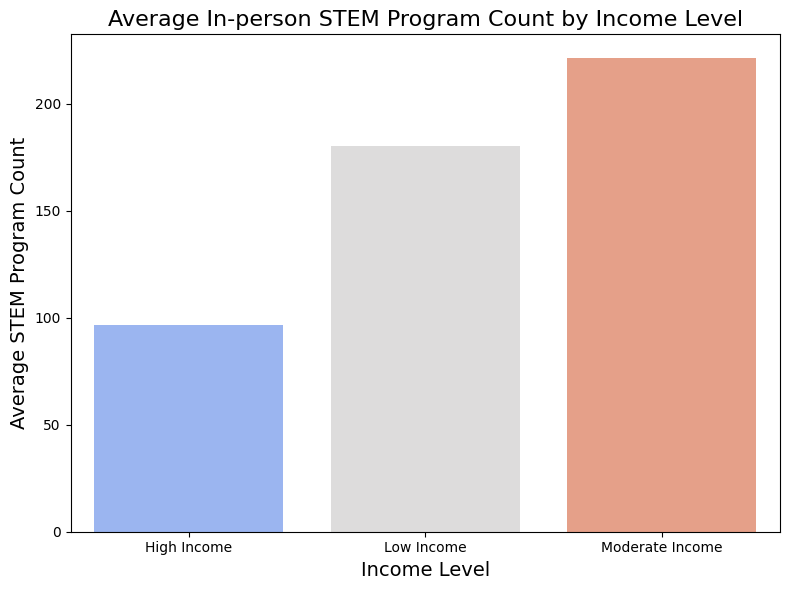

In [26]:
file_path_cleaned = '/Users/dianedli/Downloads/PYTHON 1 /Final Project/filtered_face_to_face_programs.csv'
my_chi = pd.read_csv(file_path_cleaned)

# STEM-related categories
stem_categories = ['Science', 'Math', 'Science & Math', 'Computers', 'Building & Fixing Things', 'Digital Media', 'Transportation']

# Filter STEM programs
stem_programs = my_chi[my_chi['Category Name'].isin(stem_categories)]

# Group STEM programs by ZIP Code
stem_program_counts = stem_programs.groupby('ZIP Code').size().reset_index(name='STEM Program Count')

# Ensure ZIP codes are integers for consistency
income_data['zip'] = income_data['zip'].astype(int)
stem_program_counts['ZIP Code'] = stem_program_counts['ZIP Code'].astype(int)

# Merge STEM program counts with income data
merged_data = pd.merge(stem_program_counts, income_data, left_on='ZIP Code', right_on='zip', how='left')

# Drop rows with missing data
merged_data = merged_data.dropna(subset=['STEM Program Count', 'income_household_median'])

# Correlation analysis
correlation, p_value = pearsonr(merged_data['STEM Program Count'], merged_data['income_household_median'])
print(f"Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.2e}")

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    x='income_household_median',
    y='STEM Program Count',
    data=merged_data,
    scatter_kws={'alpha': 0.7, 'edgecolor': 'k'},
    line_kws={'color': 'red', 'lw': 2},
)

# Add labels and title
plt.title('Correlation: STEM Program Count vs Median Income', fontsize=16)
plt.xlabel('Median Income ($)', fontsize=14)
plt.ylabel('STEM Program Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Classify ZIP codes by income level for binning 
low_income_threshold = merged_data['income_household_median'].quantile(0.25)
high_income_threshold = merged_data['income_household_median'].quantile(0.75)

def classify_income(income):
    if income <= low_income_threshold:
        return 'Low Income'
    elif income >= high_income_threshold:
        return 'High Income'
    else:
        return 'Moderate Income'

# Create 'Income Level' column
merged_data['Income Level'] = merged_data['income_household_median'].apply(classify_income)

# Visualization: STEM Program Counts by Income Level
income_grouped = merged_data.groupby('Income Level')['STEM Program Count'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Income Level', y='STEM Program Count', data=income_grouped, palette='coolwarm')
plt.title('Average In-person STEM Program Count by Income Level', fontsize=16)
plt.xlabel('Income Level', fontsize=14)
plt.ylabel('Average STEM Program Count', fontsize=14)
plt.tight_layout()
plt.show()

### Analyzing the Relationship Between STEM Program Availability and Black Population Demographics in Chicago

QUESTION 4: Is there a difference in the number of STEM programs in zip codes with a greater black population? 

I analyzed the relationship between STEM program availability and Black population percentages in different ZIP codes. First, I filtered STEM-related programs and grouped them by ZIP code, then merged this data with Black population percentages. I performed a correlation analysis to examine the relationship between STEM program counts and Black population percentages, visualizing the results with a scatter plot and regression line. Next, I stratified ZIP codes into groups based on Black population percentages (low, moderate, and high) and calculated the average STEM program count for each group. Finally, I visualized the results in a bar chart to highlight differences in STEM program distribution across these population groups.

DATA CLEANING: 
- When merging the black population count data and the face_to_face STEM program data, I also dropped rows with missing values. 

RESULTS: While there was a correlation coefficient of 0.13 with the black population and STEM program counts, the p-value was 0.342, making the correlation analysis be not statistically significant at the 0.05 percent level. 

PROBLEMS & HOW I SOLVED THEM: 
I anticipated running into the problem of not finding the most up-to-date data, but the dataset I used is from the US Census Bureau from October 8, 2024. 



Correlation Coefficient: 0.13
P-value: 3.42e-01


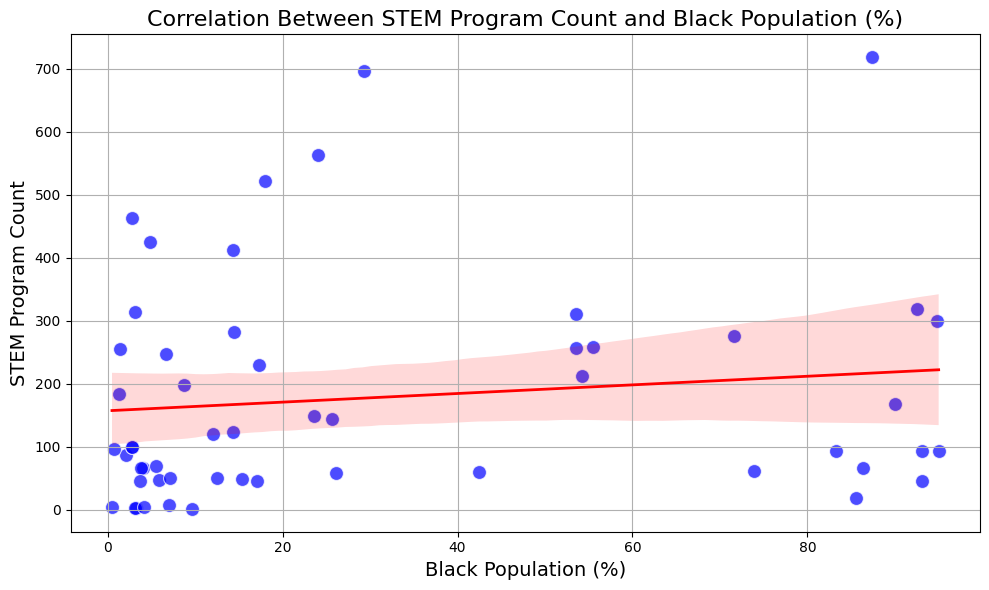

/var/folders/kq/jzvl0lj93tngqfrb3043cvjc0000gn/T/ipykernel_33134/2400403876.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Black Population Group', y='STEM Program Count', data=population_grouped, palette='coolwarm')


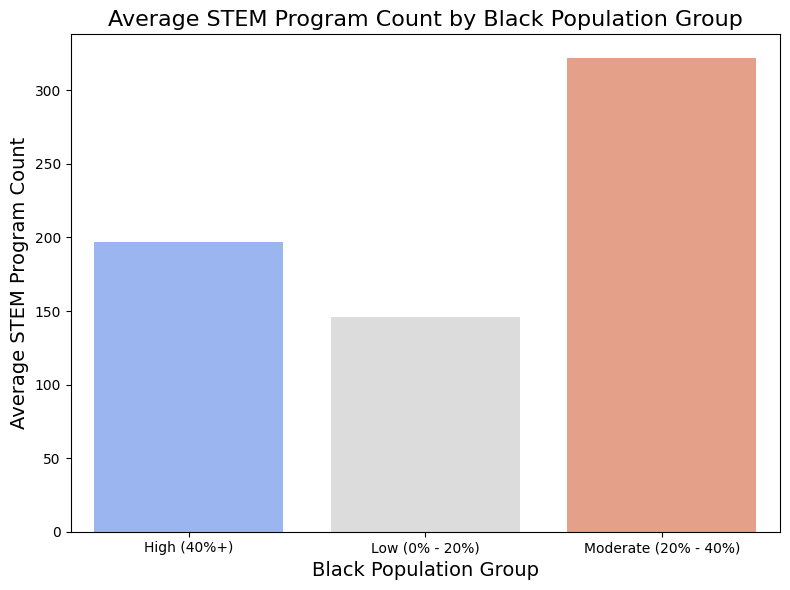

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
black_population_data = pd.read_csv('/Users/dianedli/Downloads/PYTHON 1 /Final Project/chicago_black_population(Sheet1).csv')
my_chi_cleaned = pd.read_csv('/Users/dianedli/Downloads/PYTHON 1 /Final Project/filtered_face_to_face_programs.csv')

# Filter only STEM programs
stem_categories = ['Science', 'Math', 'Science & Math', 'Computers', 'Building & Fixing Things', 'Digital Media', 'Transportation']
stem_programs = my_chi_cleaned[my_chi_cleaned['Category Name'].isin(stem_categories)]

# Group STEM programs by ZIP Code
stem_program_counts = stem_programs.groupby('ZIP Code').size().reset_index(name='STEM Program Count')

# Ensure ZIP codes are integers for consistency
black_population_data['zip'] = black_population_data['zip'].astype(int)
stem_program_counts['ZIP Code'] = stem_program_counts['ZIP Code'].astype(int)

# Merge STEM program data with Black population data
merged_data = pd.merge(stem_program_counts, black_population_data, left_on='ZIP Code', right_on='zip', how='left')

# Check for missing data and drop if necessary
merged_data = merged_data.dropna(subset=['STEM Program Count', 'race_black'])

# Correlation Analysis
correlation, p_value = pearsonr(merged_data['STEM Program Count'], merged_data['race_black'])
print(f"Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.2e}")

# Visualization: Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='race_black', y='STEM Program Count', data=merged_data, color='blue', s=100, alpha=0.7)
sns.regplot(x='race_black', y='STEM Program Count', data=merged_data, scatter=False, color='red', line_kws={"linewidth": 2})
plt.title('Correlation Between STEM Program Count and Black Population (%)', fontsize=16)
plt.xlabel('Black Population (%)', fontsize=14)
plt.ylabel('STEM Program Count', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Stratify ZIP Codes by Black Population
def classify_black_population(percentage):
    if percentage < 20:
        return 'Low Black Population'
    elif percentage < 40:
        return 'Moderate Black Population'
    else:
        return 'High Black Population'

merged_data['Black Population Group'] = merged_data['race_black'].apply(classify_black_population)

# Bar Chart: Average STEM Programs by Black Population Group
population_grouped = merged_data.groupby('Black Population Group')['STEM Program Count'].mean().reset_index()

# Define the labels with percentage ranges for x-axis
x_labels = {
    'Low Black Population': 'Low (0% - 20%)',
    'Moderate Black Population': 'Moderate (20% - 40%)',
    'High Black Population': 'High (40%+)',
}

# Replace labels with the detailed percentage ranges
population_grouped['Black Population Group'] = population_grouped['Black Population Group'].replace(x_labels)

plt.figure(figsize=(8, 6))
sns.barplot(x='Black Population Group', y='STEM Program Count', data=population_grouped, palette='coolwarm')
plt.title('Average STEM Program Count by Black Population Group', fontsize=16)
plt.xlabel('Black Population Group', fontsize=14)
plt.ylabel('Average STEM Program Count', fontsize=14)
plt.tight_layout()
plt.show()

## Conclusions and Recommendations to stakeholder(s)

Future Research:
Would be interesting to next dive into quality of program (program satisfaction ratings) and see if low or high income would have an impact on that (high income —> more funding —> higher quality)
Growth rate of number of programs vs. low and high income areas (high income —> more funding —> more programs pop up)

Action Items: 
Since there is not a significant correlation between the socio-economic factors discussed and the population demographics discussed with the distribution of programs, the directors of programs should focus more on the quality of their programs rather than the quantity of them. My_Chi could also add a section to their data collection form about specifying what workshops mean and whether they refer to in-person or online programming. Additionally, program directors should come up with more ways to make their programs accessible--be it also including online programming, hosting events across different shcool and zip codes, providing means of transportation to events, etc. 

Limitations: 
This analysis looks at the historical occurance of events and not the most recent events of the last month or 2 months. It is important to note that it might be more useful to look at current or future programs when conducting this analysis (aka creating an interactive heatmap that automatically populates when a new program is added to the dataset and only looks at data from the past 2 months). Another important caveat to add is that median_income only measures one aspect of socio-economic factors, so it may be useful to look into other factors under this umbrella like college graduation rate and crime rates. 

Summary:
In areas of low program count, neighboring zip codes usually provide more available programs. Instead of focusing on developing more programs in low income communities, program leaders should focus on developing the ones they currently have. More important to focus on quality of program over the quantity (teacher student ratio, attendance consistency, quality of instruction, work outside of meetings) 